In [77]:
from results import Comparer, Result
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def sort_dir(path: str) -> np.ndarray:
    import os

    dir_res = os.listdir(path)

    order = np.zeros(len(dir_res), dtype=int)
    for i, file in enumerate(dir_res):
        tmp = file.split("_")[0]
        if tmp == "None":
            order[i] = 9999
        else:
            order[i] = int(tmp)
    
    dir_res = np.array(dir_res, dtype="object")
    return dir_res[np.array(np.argsort(order))]

def show_plotter(axes, plt, title: str = None, xlabel: str = None, ylabel: str = None, legend: bool = False, log: bool = False, save: bool = False, save_path: str = None) -> None:
    if title is not None:
        plt.title(title)

    for ax in axes:
        if xlabel is not None:
            ax.set_xlabel(xlabel)
        if ylabel is not None:
            ax.set_ylabel(ylabel)
        if log:
            ax.set_yscale("log")
    if legend:
        plt.legend(loc="upper right")
    plt.tight_layout()
    if save:
        plt.savefig(save_path)
    plt.show()

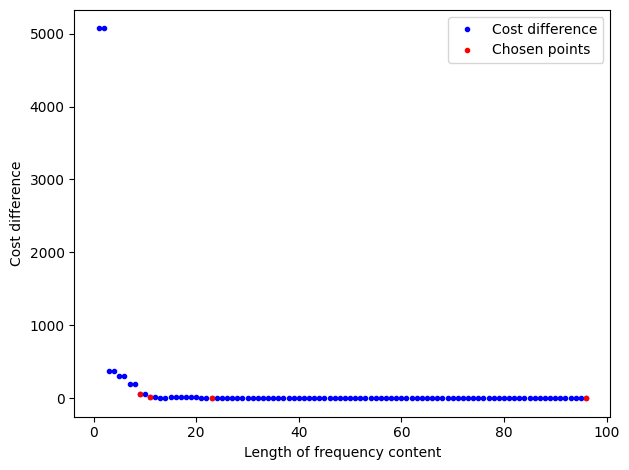

In [79]:
path = "results/runs/IES_E9H12G7-v1/"
all_results = sort_dir(path)

res = Result(path=path+all_results[0])
res_og = Result(path=path+all_results[-1])

x_axis = np.zeros(len(all_results)-1, dtype=int)
cost_diff = np.zeros(len(all_results)-1)
reference_cost = res_og.optimal_cost
for i, file in enumerate(all_results[:-1]):
    res = Result(path=path+file)
    x_axis[i] = int(file.split("_")[0])
    cost_diff[i] = reference_cost - res.optimal_cost

small_effect_idx = np.where(cost_diff < 1)[0][0]

fig, ax = plt.subplots()
ax.plot(x_axis[:], cost_diff[:], '.', label="Cost difference", color="blue")

chosen_points = [len(cost_diff)-1, small_effect_idx, 8, 10]
ax.plot(x_axis[chosen_points], cost_diff[chosen_points], '.', color="red", label="Chosen points")

save = False
show_plotter(
    [ax], 
    plt, 
    xlabel='Length of frequency content',
    ylabel="Cost difference", 
    legend=True, 
    save=save, 
    save_path="results/fig/cost_diff.png"
)

/Users/jakobolsen/Documents/4_uni/8_semester/p8/python/P8_ECM_based_OEF/results/compare_solutions.py:199: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


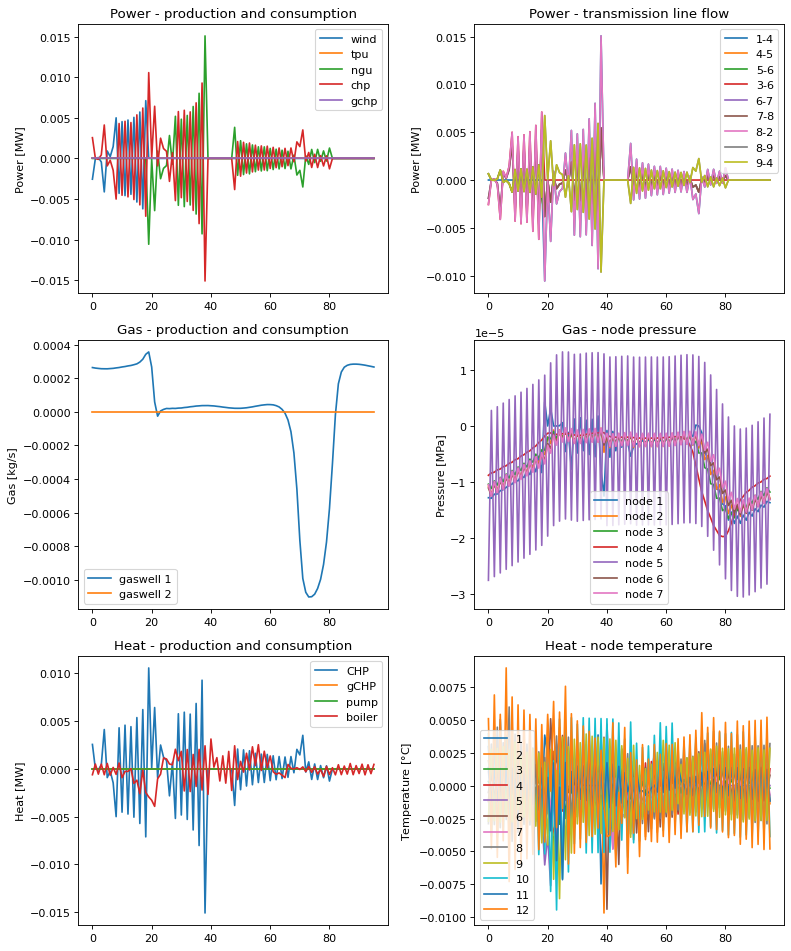

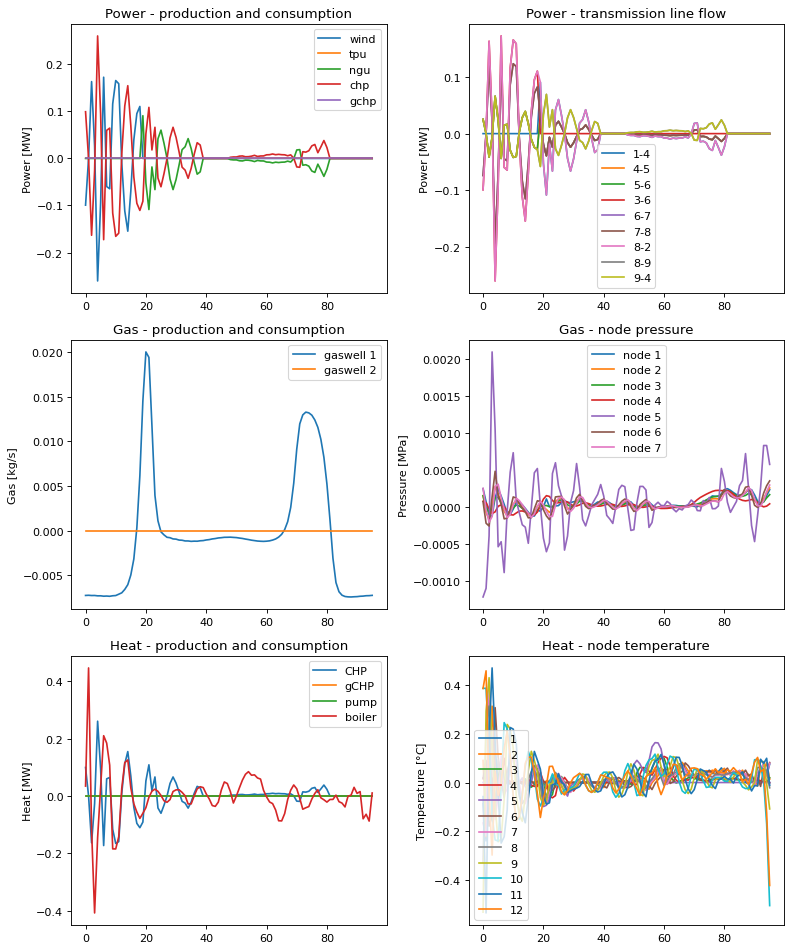

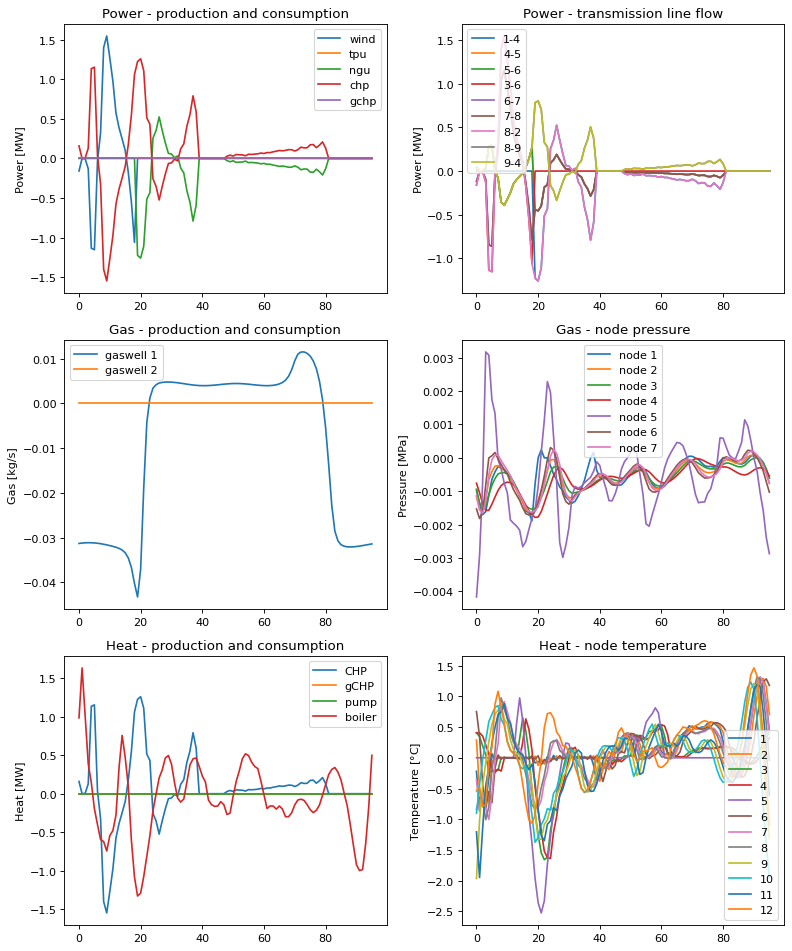

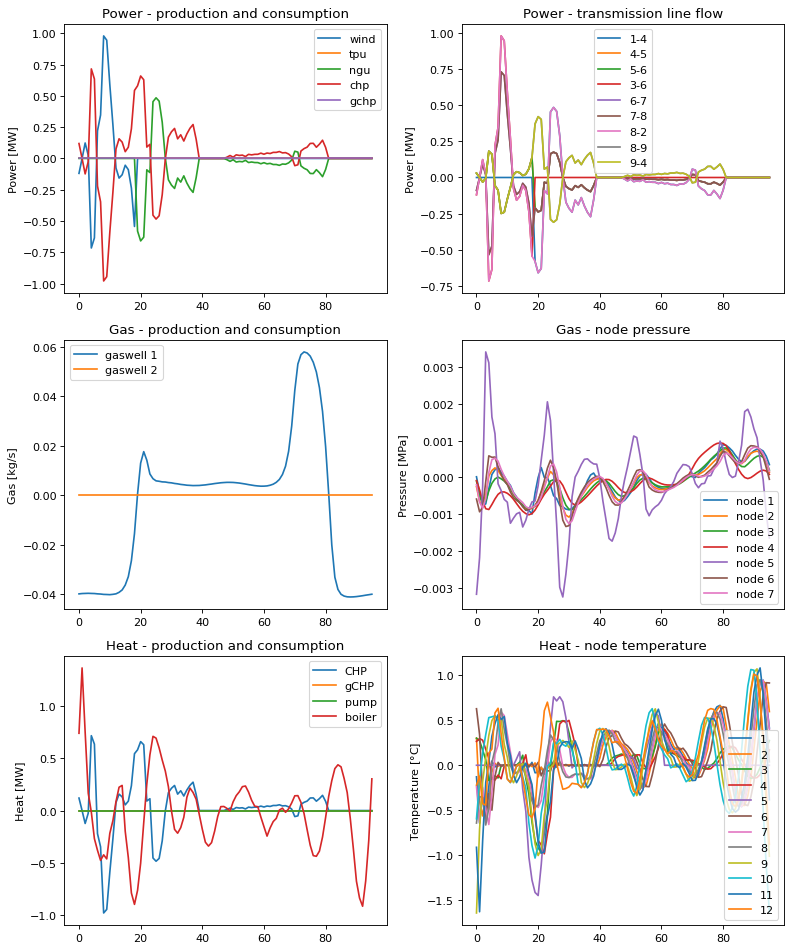

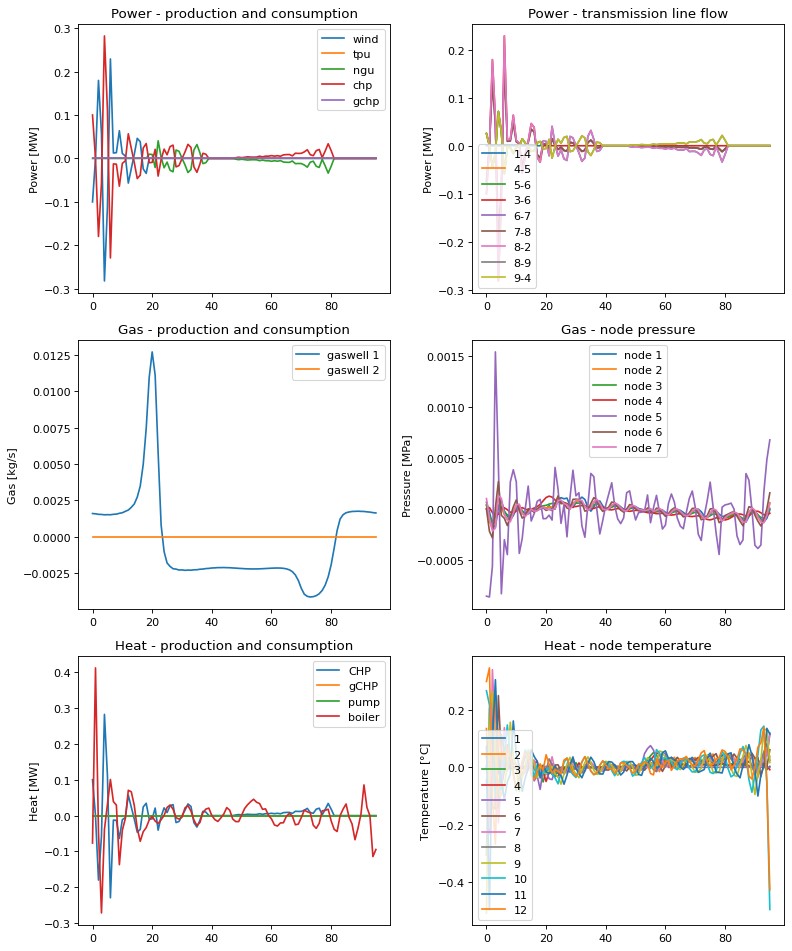

In [80]:
chosen_points.append(28)
for point in chosen_points:
    res = Result(path=path+all_results[point])
    comp = Comparer([res_og, res])
    comp.compare_all()
    comp.visualize_comparison(save_path=f"results/fig/compare_keep{point+1}.png")

In [81]:
energy_heat = np.zeros((len(all_results)-1, 2))
energy_gas = np.zeros((len(all_results)-1, 2))
for i, file in enumerate(all_results[:-1]):
    res = Result(path=path+file)
    energy_heat[i] = list(res.heat_energy_diff[0])
    energy_gas[i] = list(res.gas_energy_diff[0])

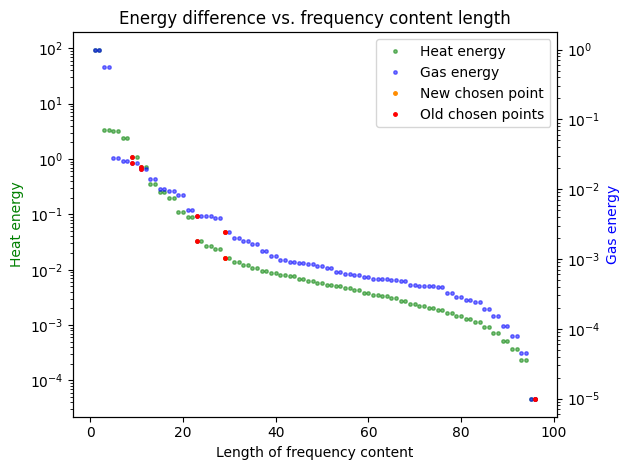

In [82]:
fig, ax1 = plt.subplots()
# log scale y axis
ax2 = ax1.twinx()
ax1.set_yscale('log')
ax2.set_yscale('log')

ln1 = ax1.plot(x_axis, energy_heat[0,0]-energy_heat[:,1], 'g.', label="Heat energy", markersize=5, alpha=0.5)
ln2 = ax2.plot(x_axis, energy_gas[0,0]-energy_gas[:,1], 'b.', label="Gas energy", markersize=5, alpha=0.5)

ax1.set_xlabel('Length of frequency content')
ax1.set_ylabel('Heat energy', color='g')
ax2.set_ylabel('Gas energy', color='b')

ln3 = ax1.plot(x_axis[28], energy_heat[28,0]-energy_heat[28,1], '.', color='darkorange', markersize=5, label="New chosen point")
ax2.plot(x_axis[28], energy_gas[28,0]-energy_gas[28,1], '.', color='darkorange',markersize=5)

ln4 = ax1.plot(x_axis[chosen_points], energy_heat[0,0]-energy_heat[chosen_points,1], 'r.', markersize=5, label="Old chosen points")
ax2.plot(x_axis[chosen_points], energy_gas[0,0]-energy_gas[chosen_points,1], 'r.', markersize=5)

lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right")
show_plotter(
    [ax1, ax2], 
    plt, 
    save=True, 
    save_path="results/fig/energy_diff.png", 
    title="Energy difference vs. frequency content length",
)

In [87]:
l = np.zeros(len(all_results))
for i, file in enumerate(all_results):
    res = Result(path=path+file)
    l[i] = int(res.description[-1])

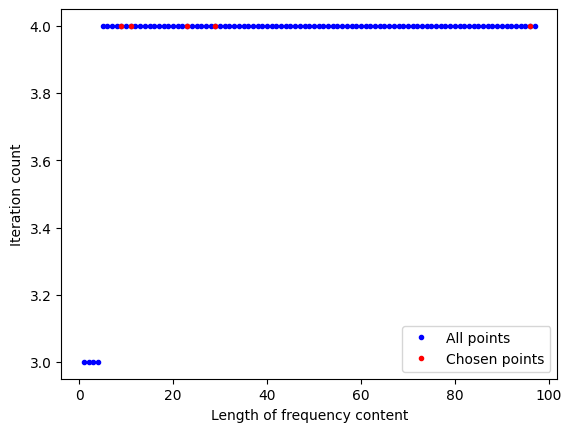

In [100]:
x_axis = np.arange(1, len(l)+1)
plt.plot(x_axis, l, '.', color='blue', label="All points")
plt.plot(x_axis[chosen_points], l[chosen_points], '.', color='red', label="Chosen points")
plt.xlabel("Length of frequency content")
plt.ylabel("Iteration count")
plt.legend(loc="lower right")
plt.savefig("results/fig/iteration_count.png")
plt.show()

In [101]:
cost_diff

array([ 5.07118031e+03,  5.07118031e+03,  3.74589612e+02,  3.74589612e+02,
        3.10109773e+02,  3.10109773e+02,  1.98861957e+02,  1.98861957e+02,
        5.30029498e+01,  5.30029498e+01,  9.83221623e+00,  9.83221623e+00,
        3.06955627e+00,  3.06955627e+00,  1.65904479e+01,  1.65904479e+01,
        2.04767655e+01,  2.04767655e+01,  1.01465128e+01,  1.01465128e+01,
        5.56110566e+00,  5.56110566e+00,  5.63109712e-01,  5.63109712e-01,
        3.81307884e-01,  3.81307884e-01,  1.76996581e-01,  1.76996581e-01,
       -4.69051723e-01, -4.69051723e-01, -7.91771916e-01, -7.91771916e-01,
       -6.91557555e-01, -6.91557555e-01, -4.18513710e-01, -4.18513710e-01,
       -3.27757473e-01, -3.27757473e-01, -5.58913436e-01, -5.58913436e-01,
       -6.63569780e-01, -6.63569780e-01, -5.25699220e-01, -5.25699220e-01,
       -3.21658764e-01, -3.21658764e-01, -1.45556822e-01, -1.45556822e-01,
       -2.65045147e-01, -2.65045147e-01, -5.90545865e-01, -5.90545865e-01,
       -7.45268680e-01, -

In [103]:
float(3.74589612e+02)

374.589612